<a href="https://colab.research.google.com/github/nnswa/Hand-Gestur-Recognition/blob/main/Skripsi_using_raw_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [16]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/SKRIPSII/CODE PROGRAM/COBA/EMG-data.csv/emg-data-10-subjects.csv')
data.head()

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Class,Label
0,254,200,253,114,244,118,254,156,0,1
1,183,202,250,114,253,82,232,202,0,1
2,255,114,103,206,255,118,237,86,0,1
3,227,114,227,238,54,82,251,202,0,1
4,251,118,227,247,190,47,255,82,0,1


In [20]:
# Pisahkan fitur (channel1-channel8) dan target (class)
X = data.iloc[:, :-1].values  # Semua kolom kecuali kolom terakhir (fitur)
y = data.iloc[:, -2].values    # Kolom kedua terakhir (label)

# Cek kelas yang ada dalam y
unique_classes = np.unique(y)
print("Unique classes in y:", unique_classes)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Setup K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

accuracies = []
reports = []

# cross-validation
for train_index, test_index in kf.split(X_scaled):
    print(f'Fold {fold}')
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Inisialisasi model SVM
    svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')

    # Training model
    svm_model.fit(X_train, y_train)

    # Prediksi pada data testing
    y_pred = svm_model.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    accuracies.append(accuracy)
    reports.append(report)

    print(f'Accuracy: {accuracy}')
    fold += 1

# Rata-rata akurasi dari semua fold
mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')


Unique classes in y: [0 1 2 3 4 5 6 7 8 9]
Fold 1
Accuracy: 0.9533333333333334
Fold 2
Accuracy: 0.9283333333333333
Fold 3
Accuracy: 0.955
Fold 4
Accuracy: 0.9316666666666666
Fold 5
Accuracy: 0.9483333333333334
Mean Accuracy: 0.9433333333333334


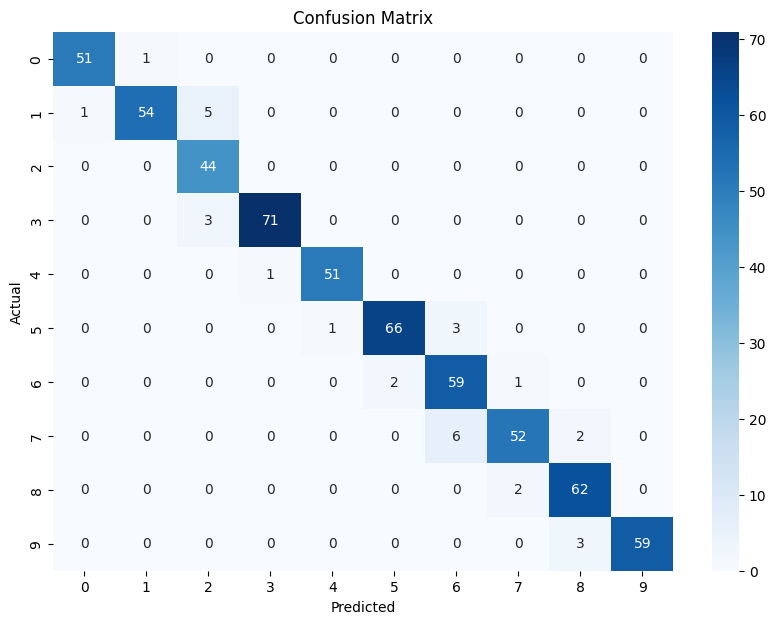

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.98      0.90      0.94        60
           2       0.85      1.00      0.92        44
           3       0.99      0.96      0.97        74
           4       0.98      0.98      0.98        52
           5       0.97      0.94      0.96        70
           6       0.87      0.95      0.91        62
           7       0.95      0.87      0.90        60
           8       0.93      0.97      0.95        64
           9       1.00      0.95      0.98        62

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cetak classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
